In [ ]:
# 01_EDA.ipynb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset

In [9]:
df = pd.read_csv(r"C:\Users\LENOVO\retail_sales_forecasting\data\retail_store_inventory.csv", parse_dates=['Date'])

In [ ]:
# Overview

In [10]:
print(df.head())

        Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1             Sunn

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Store ID            73100 non-null  object        
 2   Product ID          73100 non-null  object        
 3   Category            73100 non-null  object        
 4   Region              73100 non-null  object        
 5   Inventory Level     73100 non-null  int64         
 6   Units Sold          73100 non-null  int64         
 7   Units Ordered       73100 non-null  int64         
 8   Demand Forecast     73100 non-null  float64       
 9   Price               73100 non-null  float64       
 10  Discount            73100 non-null  int64         
 11  Weather Condition   73100 non-null  object        
 12  Holiday/Promotion   73100 non-null  int64         
 13  Competitor Pricing  73100 non-null  float64   

In [12]:
print(df.describe())

       Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count     73100.000000  73100.000000   73100.000000     73100.000000   
mean        274.469877    136.464870     110.004473       141.494720   
std         129.949514    108.919406      52.277448       109.254076   
min          50.000000      0.000000      20.000000        -9.990000   
25%         162.000000     49.000000      65.000000        53.670000   
50%         273.000000    107.000000     110.000000       113.015000   
75%         387.000000    203.000000     155.000000       208.052500   
max         500.000000    499.000000     200.000000       518.550000   

              Price      Discount  Holiday/Promotion  Competitor Pricing  
count  73100.000000  73100.000000       73100.000000        73100.000000  
mean      55.135108     10.009508           0.497305           55.146077  
std       26.021945      7.083746           0.499996           26.191408  
min       10.000000      0.000000           0.00000

In [ ]:
# Plot total sales over time

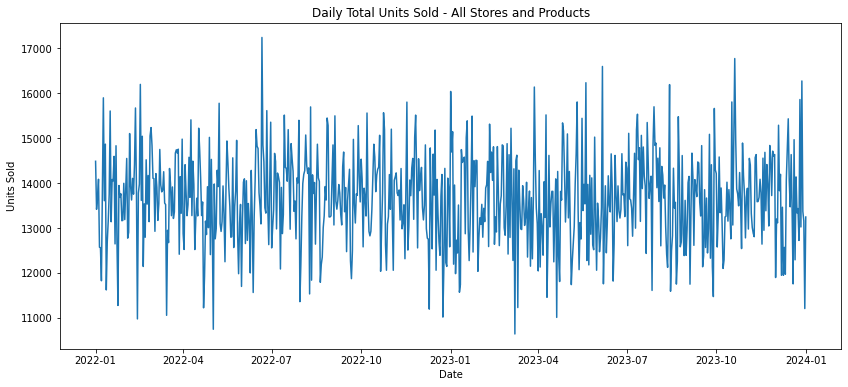

In [18]:
daily_sales = df.groupby('Date')['Units Sold'].sum()
plt.figure(figsize=(14,6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Daily Total Units Sold - All Stores and Products')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

In [ ]:
# Seasonality by month

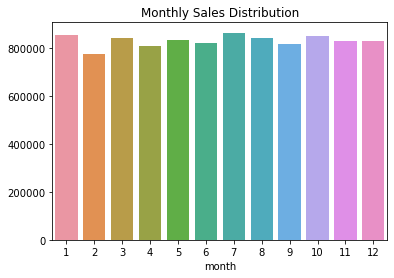

In [19]:
df['month'] = df['Date'].dt.month
monthly_sales = df.groupby('month')['Units Sold'].sum()
plt.figure()
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Distribution')
plt.show()

In [ ]:
# Impact of promotions on sales

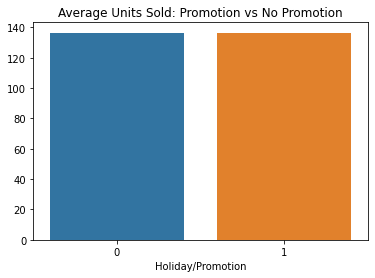

In [20]:
promo_sales = df.groupby('Holiday/Promotion')['Units Sold'].mean()
plt.figure()
sns.barplot(x=promo_sales.index, y=promo_sales.values)
plt.title('Average Units Sold: Promotion vs No Promotion')
plt.show()

In [ ]:
# Units sold by Store over time (example for Store ID 1)

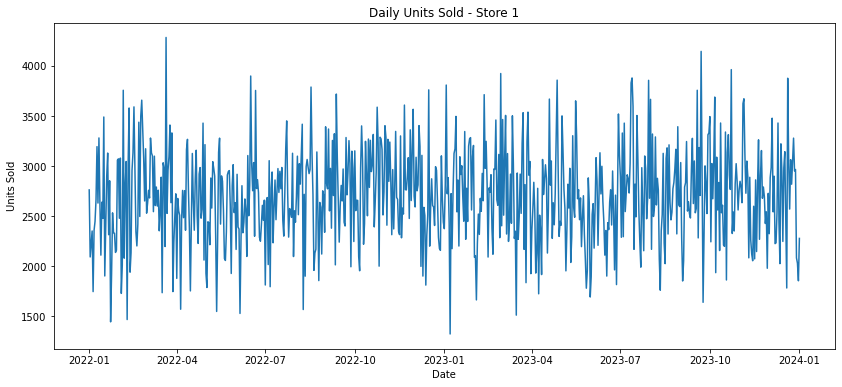

In [24]:
store_1_sales = df[df['Store ID'] == 'S001'].groupby('Date')['Units Sold'].sum()
plt.figure(figsize=(14,6))
plt.plot(store_1_sales.index, store_1_sales.values)
plt.title('Daily Units Sold - Store 1')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()